# Exploring DES 5-year data

This notebook explores the original 5-year data, including real and fakes

In [2]:
import glob,os
import argparse
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import sys
sys.path.append("..")
from utils import data_utils as du
from utils import visualization_utils as vu

/Users/anaismoller/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
#init path
raw_dir = os.environ.get("DES_DATA")

In [4]:
# load the data: real and fakes
df = {}
for dtype in ["real","fake"]:
    list_files = glob.glob(f"{raw_dir}/DESALL_forcePhoto_{dtype}_snana_fits/*PHOT.FITS")
    for fname in list_files:
        df_header, df_phot = du.read_fits(fname)
        df[dtype] = df_header.merge(df_phot,on="SNID")

In [17]:
# add S/N computation
for dtype in ["real","fake"]:
    df[dtype]['S/N'] = df[dtype]['FLUXCAL']/df[dtype]['FLUXCALERR']

# General stats

In [19]:
# Some general stats
for dtype in ["real","fake"]:
    print(f"{dtype} light-curves",len(df[dtype]["SNID"].unique()))

real light-curves 6404
fake light-curves 5588


## Fake inspection

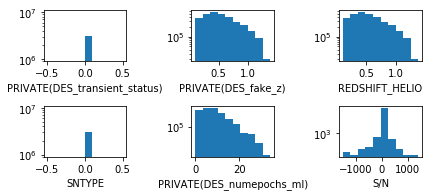

In [25]:
# General properties
list_var = ['PRIVATE(DES_transient_status)','PRIVATE(DES_fake_z)','REDSHIFT_HELIO','SNTYPE','PRIVATE(DES_numepochs_ml)',"S/N"]
fig = plt.figure()
for i,var in enumerate(list_var):
    ax=plt.subplot(3,3,i+1)
    ax.hist(df["fake"][var])
    ax.set_yscale("log")
    ax.set_xlabel(var)
fig.tight_layout()
fig.subplots_adjust(top=0.88)

Fakes are only type Ia.

Transient_status:
- (False) if it was properly run on fakes then it is not a good indicator of the good light-curves
- (True) if it wasnt properly run, either rerun it or not use it in fakes, only in data 
- I could see if I construct my own transient status with numepochs. To be done next week (~April 20th) with Mat Smith

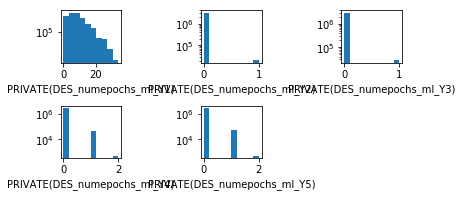

In [28]:
# ML Real Bogus
list_var_ML = ['PRIVATE(DES_numepochs_ml_Y1)','PRIVATE(DES_numepochs_ml_Y2)','PRIVATE(DES_numepochs_ml_Y3)','PRIVATE(DES_numepochs_ml_Y4)','PRIVATE(DES_numepochs_ml_Y5)']
fig = plt.figure()
for i,var in enumerate(list_var_ML):
    ax=plt.subplot(3,3,i+1)
    ax.hist(df["fake"][var])
    ax.set_yscale("log")
    ax.set_xlabel(var)
#     print(var,df_fake[var].value_counts())
fig.tight_layout()
fig.subplots_adjust(top=0.88)

Numepochs ML seem to work only in year 1 for fakes. Probably need to rerun if to be used for fakes in other years

# Real vs fake properties

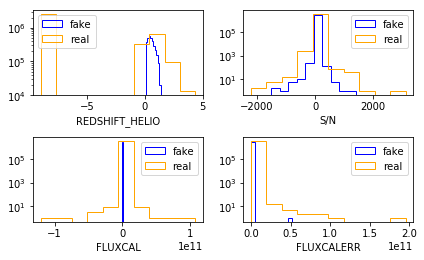

In [33]:
# parameter distribution
list_var = ["REDSHIFT_HELIO","S/N","FLUXCAL","FLUXCALERR"]
fig = plt.figure()
for i,var in enumerate(list_var):
    ax=plt.subplot(2,2,i+1)
    ax.hist(df["fake"][var],histtype="step",color="blue",label='fake')
    ax.hist(df["real"][var],histtype="step",color="orange",label="real")
    ax.set_xlabel(var)
    ax.set_yscale("log")
    ax.legend()
#     print(var,df_fake[var].value_counts())
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plot_dir = "../dumps/general_figures"
Path(plot_dir).mkdir(parents=True, exist_ok=True)
plt.savefig(f"{plot_dir}/hist_fake_real.png")

# Plot lcs

In [34]:
def plot_lcs(df_real, df_fake,dump_dir):
    """Plot real and fake light-curves
    """
    path_plots = f'{dump_dir}/real/'
    vu.plot_random_lcs(df_real,path_plots)
    path_plots = path_plots.replace('real',"fake")
    vu.plot_random_lcs(df_fake,path_plots) 

[Plot light-curves] 
[Plot light-curves] 


/Users/anaismoller/miniconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


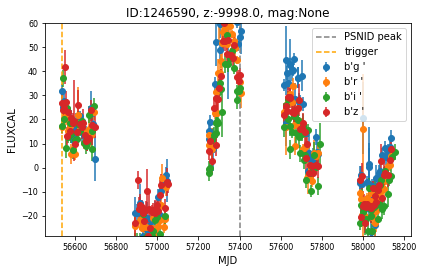

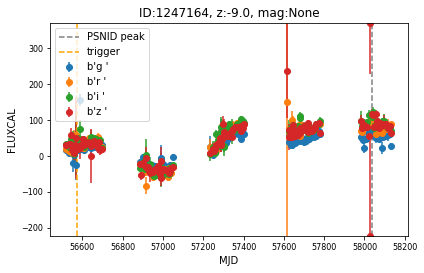

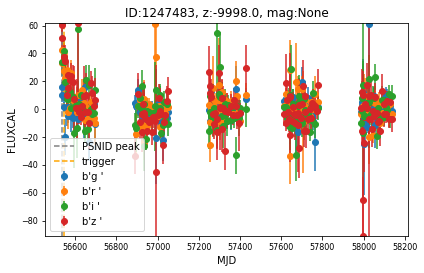

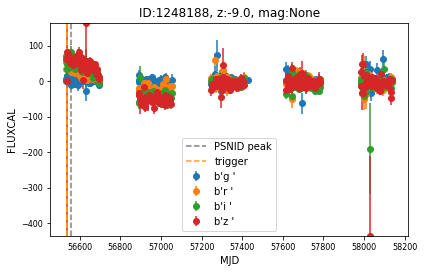

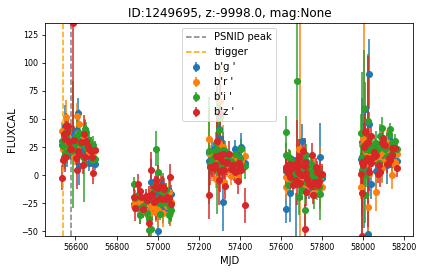

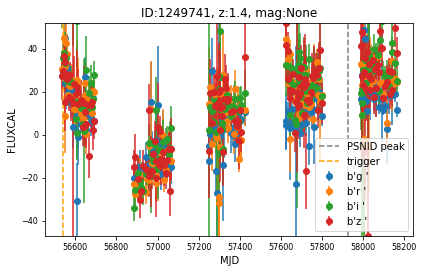

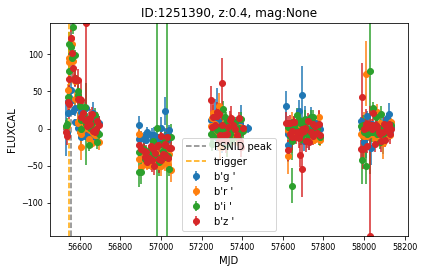

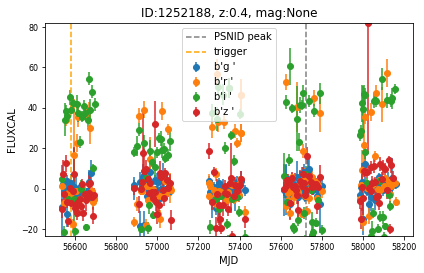

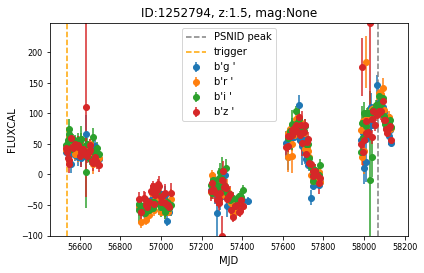

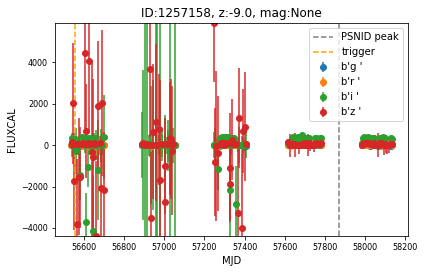

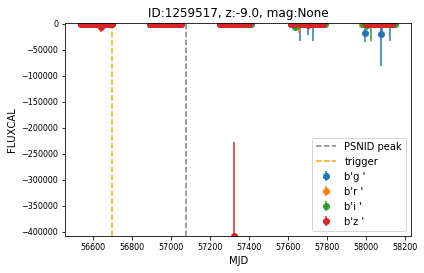

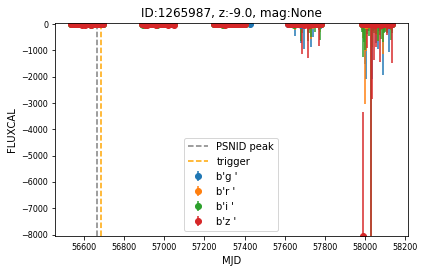

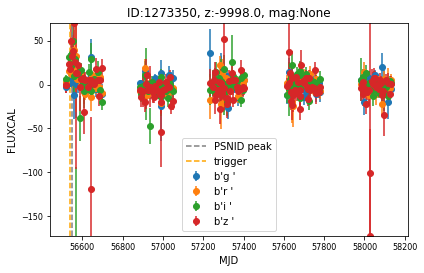

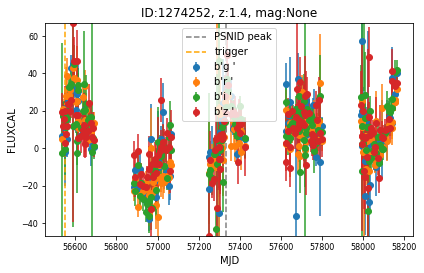

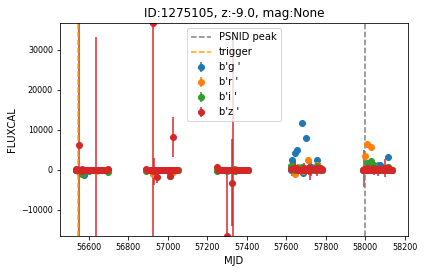

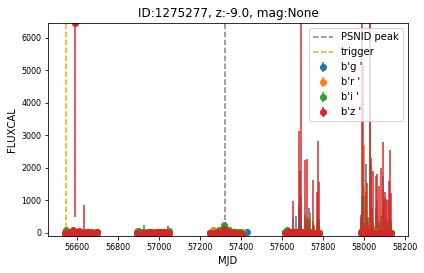

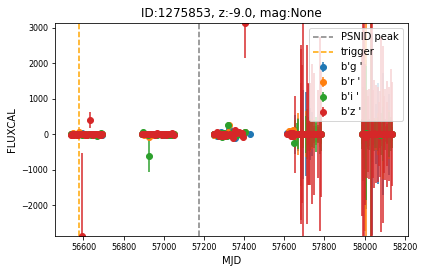

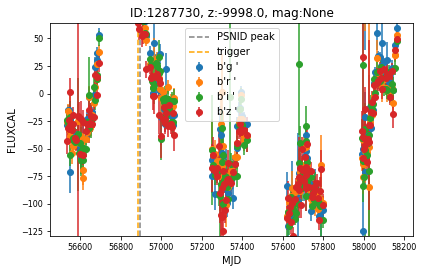

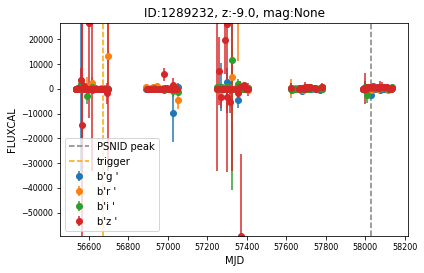

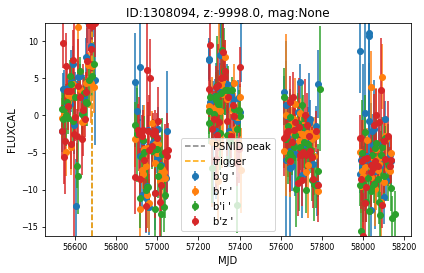

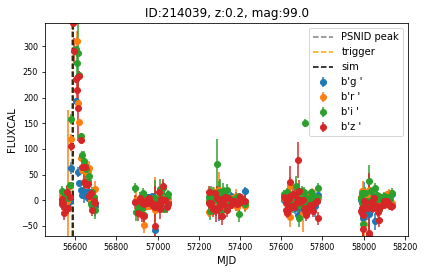

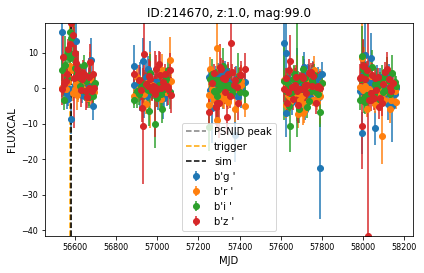

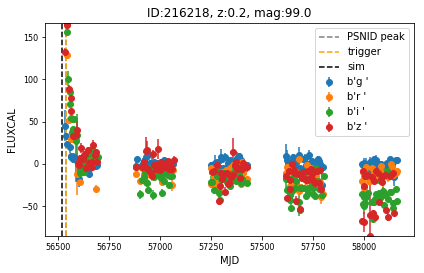

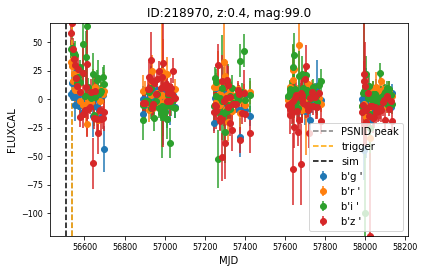

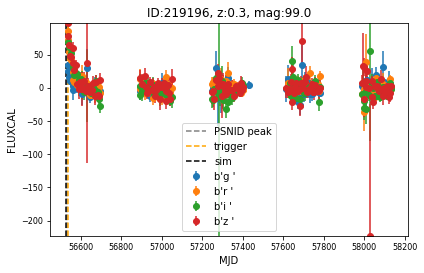

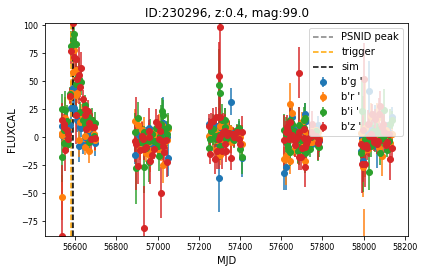

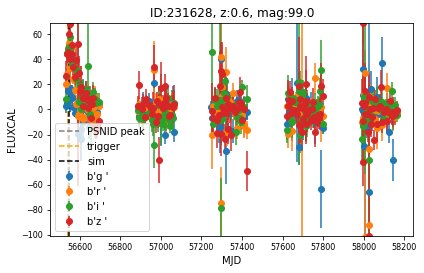

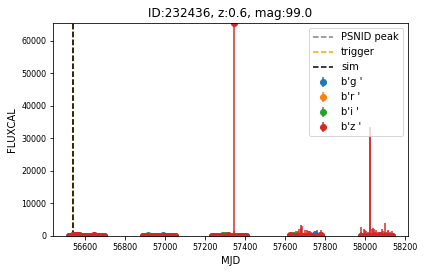

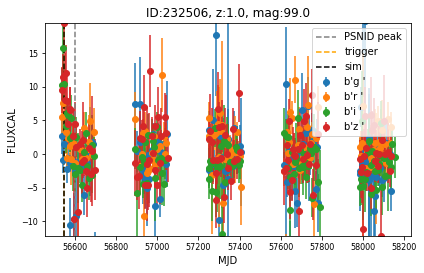

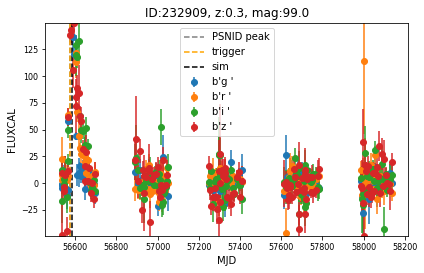

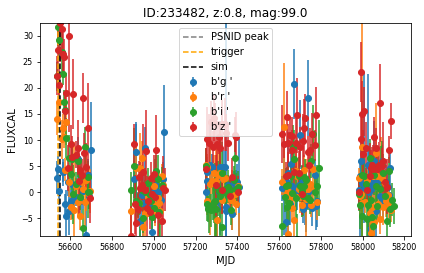

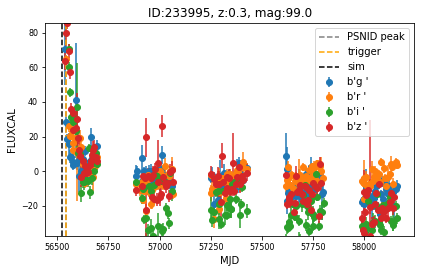

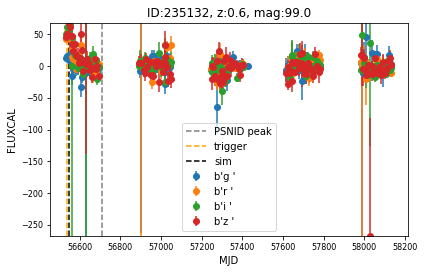

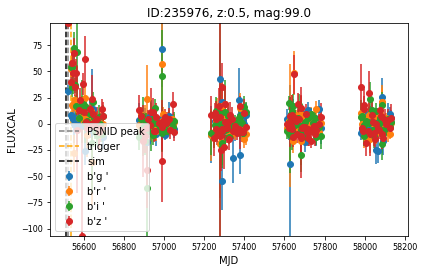

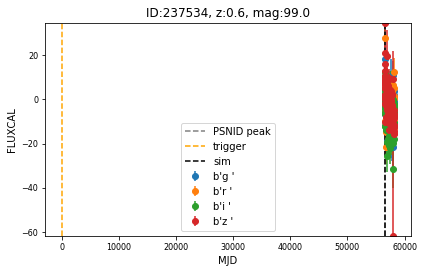

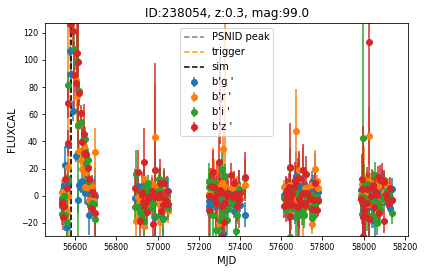

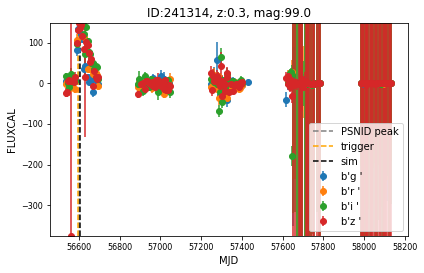

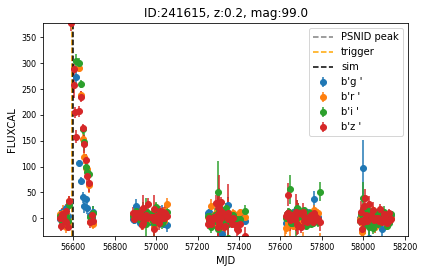

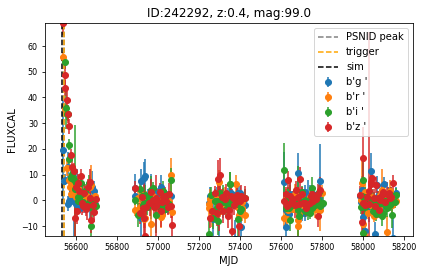

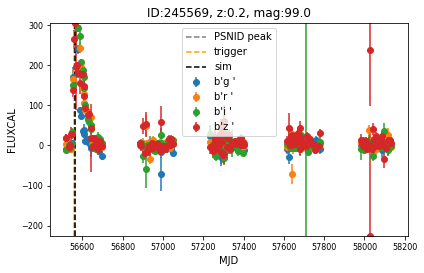

In [35]:
plot_lcs(df["real"], df["fake"],"../dumps/yearly_photometry")